# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "버스 정류장 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 데이터 안내

[기본 데이터]
* 1.1 BUS_STATION_BOARDING_MONTH_202204.csv

* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station.csv

* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '1.1 BUS_STATION_BOARDING_MONTH_202204.csv'파일을 'bus_station' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요

In [2]:
import sys
import numpy as np
import pandas as pd

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station = pd.read_csv('1.1 BUS_STATION_BOARDING_MONTH_202204.csv', encoding='cp949')
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [4]:
# 데이터 프레임의 Shape을 확인합니다.
bus_station.shape

(1169878, 8)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'bus_station' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.169878e+06,1.169878e+06,1.169878e+06,1.169878e+06
mean,2.022042e+07,1.108042e+02,1.082804e+02,2.022043e+07
std,8.661492e+00,1.554787e+02,1.420829e+02,2.667754e+01
min,2.022040e+07,0.000000e+00,0.000000e+00,2.022040e+07
25%,2.022041e+07,1.800000e+01,2.100000e+01,2.022041e+07
50%,2.022042e+07,6.300000e+01,6.800000e+01,2.022042e+07
75%,2.022042e+07,1.460000e+02,1.450000e+02,2.022043e+07
max,2.022043e+07,3.990000e+03,3.615000e+03,2.022050e+07


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 71.4+ MB


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station.columns

Index(['사용일자', '노선번호', '노선명', '버스정류장ARS번호', '역명', '승차총승객수', '하차총승객수', '등록일자'], dtype='object')

#### [실습문제3] 위 데이터에서 버스정류장 위치를 구 별로 구분 하고 싶습니다.

* 'bus_station' 데이터의 정보를 확인해보세요.

* 어떻게 해야 할까요?? (tip! 버스정류장ARS번호의 앞 두자리가 구를 의미합니다.)

* '자치구' column을 추가하여 정류장이 위치한 구 이름을 등록해주세요.


In [9]:
# bus_station에서 버스정류장ARS번호의 정보를 확인해보세요.
bus_station['버스정류장ARS번호']

0          06243
1          06242
2          06238
3          06309
4          11428
           ...  
1169873    12004
1169874    06278
1169875    16555
1169876    25236
1169877    06280
Name: 버스정류장ARS번호, Length: 1169878, dtype: object

In [10]:
# 버스정류장 ARS 번호의 앞자리 2개로 새로 컬럼 생성합니다
bus_station['구'] = bus_station['버스정류장ARS번호'].str.slice(start=0, stop=2)

In [11]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,06
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,06
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,06
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,06
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,11


* 버스정류장 ARS 번호 - 01~25까지 앞 숫자 두개가 위치한 구를 의미
    01. 종로구
    02. 중구
    03. 용산구
    04. 성동구
    05. 광진구
    06. 동대문구
    07. 중랑구
    08. 성북구
    09. 강북구
    10. 도봉구
    11. 노원구
    12. 은평구
    13. 서대문구
    14. 마포구
    15. 양천구
    16. 강서구
    17. 구로구
    18. 금천구
    19. 영등포구
    20. 동작구
    21. 관악구
    22. 서초구
    23. 강남구
    24. 송파구
    25. 강동구

In [12]:
# 구 코드를 구 이름으로 변환합니다
bus_station['구'] = bus_station['구'].map({
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. (head, tail 등)
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구


#### [실습문제4] 결측치를 처리 합시다 



In [14]:
# (가상기점),(가상종점)때문에 ARS번호가 '~'로 나오는 곳이 있습니다 확인해볼까요?
bus_station.loc[bus_station['버스정류장ARS번호'] == '~']

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,구
747,20220401,750B,750B번(은평차고지~서울대),~,은평공영차고지(가상),0,100,20220404,NaN
852,20220401,602,602번(양천공용차고지~시청앞),~,양천공영차고지(기점가상),10,0,20220404,NaN
1048,20220401,2227,2227번(중랑공영차고지~중곡역),~,중랑공영차고지(기점가상),1,0,20220404,NaN
1252,20220401,2311,2311번(중랑차고지~문정동),~,중랑공영차고지(기점가상),7,0,20220404,NaN
1479,20220401,2312,2312번(중랑공영차고지~강동공영차고지),~,중랑공영차고지(기점가상),4,0,20220404,NaN
...,...,...,...,...,...,...,...,...,...
1168831,20220430,1119,1119번(강북청소년수련관난나~녹천역),~,선일교통종점(가상),0,1,20220503,NaN
1169138,20220430,5523,5523번(보성운수기종점~서울대입구역),~,보성운수기종점(가상),2,129,20220503,NaN
1169509,20220430,153,153번(우이동~당곡사거리),~,우이동도선사입구(기점가상),10,2,20220503,NaN
1169612,20220430,2015,2015번(신내공영차고지~동대문운동장),~,중랑공영차고지(기점가상),16,0,20220503,NaN


In [15]:
# NaN 값을 제거 하겠습니다
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
 8   구           1064594 non-null  object
dtypes: int64(4), object(5)
memory usage: 80.3+ MB


In [16]:
bus_station = bus_station.loc[bus_station['버스정류장ARS번호'] != '~']

In [17]:
# 다시 bus_station의 정보를 확인해볼까요?
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구


In [18]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164704 entries, 0 to 1169877
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1164704 non-null  int64 
 1   노선번호        1164704 non-null  object
 2   노선명         1164704 non-null  object
 3   버스정류장ARS번호  1164704 non-null  object
 4   역명          1164704 non-null  object
 5   승차총승객수      1164704 non-null  int64 
 6   하차총승객수      1164704 non-null  int64 
 7   등록일자        1164704 non-null  int64 
 8   구           1064594 non-null  object
dtypes: int64(4), object(5)
memory usage: 88.9+ MB


In [19]:
# 버스정류장ARS번호의 type을 변경해볼까요?
bus_station['버스정류장ARS번호'].astype('int')

0           6243
1           6242
2           6238
3           6309
4          11428
           ...  
1169873    12004
1169874     6278
1169875    16555
1169876    25236
1169877     6280
Name: 버스정류장ARS번호, Length: 1164704, dtype: int32

#### [실습문제5] 구별로 버스정류장이 몇 개 있는지 궁금합니다

* 구별로 버스 정류장의 개수를 확인해 주세요


In [20]:
# nunique로 고유값의 갯수만 확인해볼게요
bus_station.groupby('구', as_index=True)['버스정류장ARS번호'].nunique()

구
강남구     506
강동구     373
강북구     413
강서구     566
관악구     468
광진구     272
구로구     486
금천구     345
노원구     515
도봉구     361
동대문구    306
동작구     442
마포구     568
서대문구    460
서초구     600
성동구     436
성북구     606
송파구     416
양천구     323
영등포구    467
용산구     323
은평구     501
종로구     350
중구      178
중랑구     423
Name: 버스정류장ARS번호, dtype: int64

In [21]:
# 강남구와 서초구에 500 개가 넘는 버스정류장이 있다는데, 확인해봅시다.
# (23783 --> 남양주네? 왜? 2015년경 버스 노선 정리 작업 프로젝트를 하면서 서울에서 경기도까지 이어지는 노선들의 버스정류장 ARS번호를
# 부여하는 과정에서 서울시의 코드를 부여함으로서 생긴 현상임. 하지만 우리는 서울시 내의 데이터가 필요하니까 적절한 조치가 필요하겠지?)
bus_station_unique = bus_station.groupby("구")["버스정류장ARS번호"].unique()
np.set_printoptions(threshold=sys.maxsize)
print(bus_station_unique['강남구'])

['23783' '23081' '23074' '23062' '23045' '23061' '23771' '23419' '23420'
 '23421' '23405' '23423' '23424' '23425' '23150' '23404' '23406' '23465'
 '23380' '23381' '23382' '23362' '23395' '23240' '23511' '23509' '23242'
 '23197' '23192' '23172' '23173' '23174' '23175' '23180' '23161' '23155'
 '23151' '23430' '23429' '23149' '23157' '23159' '23182' '23183' '23184'
 '23186' '23187' '23189' '23199' '23244' '23245' '23236' '23360' '23361'
 '23449' '23383' '23384' '23450' '23385' '23407' '23408' '23320' '23426'
 '23427' '23428' '23411' '23416' '23417' '23418' '23287' '23288' '23305'
 '23306' '23259' '23260' '23201' '23217' '23218' '23277' '23280' '23283'
 '23284' '23196' '23188' '23171' '23166' '23165' '23158' '23156' '23148'
 '23104' '23102' '23101' '23103' '23167' '23169' '23170' '23198' '23473'
 '23438' '23249' '23262' '23224' '23225' '23226' '23227' '23456' '23334'
 '23335' '23336' '23457' '23338' '23459' '23339' '23340' '23326' '23327'
 '23228' '23229' '23233' '23234' '23247' '23248' '2

In [22]:
# 서울의 버스 정류장 데이터만 포함하고 있는 csv 파일 입니다 (서울 공공데이터 포탈)
# https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do
bus_station_seoul = pd.read_csv('1.1 bus_station.csv')

In [23]:
# 서울의 버스정류장 데이터의 정보를 확인해보세요.
bus_station_seoul.describe()

,ARS-ID
count,10935.000000
mean,14296.921262
std,6917.165410
min,1001.000000
25%,8754.000000
50%,14538.000000
75%,20548.000000
max,25999.000000


In [24]:
# 데이터를 자세히 살펴볼까요?
bus_station_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS-ID  10935 non-null  int64 
 1   정류소명    10935 non-null  object
dtypes: int64(1), object(1)
memory usage: 171.0+ KB


In [25]:
bus_station_seoul.head()

,ARS-ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [27]:
# 데이터의 컬럼명을 바꿔볼까요? (to 버스정류장ARS번호)
bus_station_seoul.rename(columns={'ARS-ID':'버스정류장ARS번호'}, inplace=True)
bus_station_seoul.head()

,버스정류장ARS번호,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [28]:
# 서울시 버스정류장 데이터와 bus_station을 합쳐볼까요? 
bus_station.loc[bus_station['버스정류장ARS번호']==1001]

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,구


In [29]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164704 entries, 0 to 1169877
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1164704 non-null  int64 
 1   노선번호        1164704 non-null  object
 2   노선명         1164704 non-null  object
 3   버스정류장ARS번호  1164704 non-null  object
 4   역명          1164704 non-null  object
 5   승차총승객수      1164704 non-null  int64 
 6   하차총승객수      1164704 non-null  int64 
 7   등록일자        1164704 non-null  int64 
 8   구           1064594 non-null  object
dtypes: int64(4), object(5)
memory usage: 88.9+ MB


In [30]:
bus_station = bus_station.astype({"버스정류장ARS번호":'int'})

In [31]:
df = pd.merge(bus_station, bus_station_seoul, how='inner', on='버스정류장ARS번호')

In [32]:
# 합쳐진 데이터를 확인해볼까요?
df

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,구,정류소명
0,20220401,2112,2112번(면목동~성북동),6243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구,장안동삼성쉐르빌아파트
1,20220401,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,75,197,20220404,동대문구,장안동삼성쉐르빌아파트
2,20220401,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,21,245,20220404,동대문구,장안동삼성쉐르빌아파트
3,20220401,2416,2416번(중랑공영차고지~삼성역),6243,장안동삼성쉐르빌아파트,42,268,20220404,동대문구,장안동삼성쉐르빌아파트
4,20220402,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,12,127,20220405,동대문구,장안동삼성쉐르빌아파트
...,...,...,...,...,...,...,...,...,...,...
1060881,20220429,7019,7019번(은평공영차고지~시청(서소문)),12242,응암2동주민센터,3,161,20220502,은평구,응암2동주민센터
1060882,20220429,7734,7734번(진관공영차고지~홍대입구역),12242,응암2동주민센터,29,139,20220502,은평구,응암2동주민센터
1060883,20220430,7734,7734번(진관공영차고지~홍대입구역),12242,응암2동주민센터,15,82,20220503,은평구,응암2동주민센터
1060884,20220430,7019,7019번(은평공영차고지~시청(서소문)),12242,응암2동주민센터,2,99,20220503,은평구,응암2동주민센터


In [33]:
# 구 별로 버스 정류장의 개수를 확인
seoul_bus_station_ARS = df.groupby('구', as_index=True)['버스정류장ARS번호'].nunique()
seoul_bus_station_ARS

구
강남구     499
강동구     369
강북구     413
강서구     566
관악구     466
광진구     269
구로구     486
금천구     345
노원구     514
도봉구     359
동대문구    306
동작구     438
마포구     562
서대문구    456
서초구     600
성동구     435
성북구     602
송파구     415
양천구     319
영등포구    465
용산구     323
은평구     501
종로구     349
중구      178
중랑구     380
Name: 버스정류장ARS번호, dtype: int64

In [34]:
# 버스정류장ARS번호 갯수를 확인해볼까요?
df['버스정류장ARS번호'].nunique()

10615

#### [실습문제6] 구 별로 버스 노선이 몇 개나 지나가는지 궁금합니다.

* 구별로 버스 노선의 개수를 확인해 주세요

In [35]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station_line = df.groupby('구', as_index=True)['노선번호'].nunique()
seoul_bus_station_line

구
강남구      91
강동구      21
강북구      67
강서구      49
관악구      86
광진구      41
구로구      79
금천구      58
노원구      57
도봉구      46
동대문구     73
동작구      94
마포구      97
서대문구    107
서초구      93
성동구      58
성북구      99
송파구      55
양천구      56
영등포구    101
용산구      67
은평구      71
종로구     106
중구      103
중랑구      48
Name: 노선번호, dtype: int64

#### [실습문제7] 각 구별로 승차 총 승객수, 하차 총 승객수를 알아봅시다

* groupby 를 활용해 봅시다.

In [36]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station_sum = df.groupby('구', as_index=True)['승차총승객수', '하차총승객수'].sum()
seoul_bus_station_sum

C:\Users\User\AppData\Local\Temp\ipykernel_5420\2339390773.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_bus_station_sum = df.groupby('구', as_index=True)['승차총승객수', '하차총승객수'].sum()


,승차총승객수,하차총승객수
구,,
강남구,8030483,7569213
강동구,2890053,2830506
강북구,4825181,4671783
강서구,4681083,4652828
관악구,7655819,7792476
광진구,2749448,2753411
구로구,4942197,4730992
금천구,3776658,3581930
노원구,4353295,4292724


#### [실습문제8] 각 구별로 승차 평균 승객수, 하차 평균 승객수를 알아봅시다

In [37]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station_mean = df.groupby('구', as_index=True)['승차총승객수', '하차총승객수'].mean()
seoul_bus_station_mean.rename(columns={'승차총승객수':'승차평균승객수','하차총승객수':'하차평균승객수'}, inplace=True)
seoul_bus_station_mean

C:\Users\User\AppData\Local\Temp\ipykernel_5420\3744842803.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_bus_station_mean = df.groupby('구', as_index=True)['승차총승객수', '하차총승객수'].mean()


,승차평균승객수,하차평균승객수
구,,
강남구,128.767927,121.371512
강동구,99.161194,97.118065
강북구,133.020373,128.791504
강서구,88.119480,87.587591
관악구,154.753674,157.516040
광진구,118.352546,118.523137
구로구,119.235615,114.140076
금천구,123.098370,116.751304
노원구,88.476211,87.245168


#### [실습문제9] 데이터 프레임을 합쳐보겠습니다. 

In [38]:
# 네 개 파일을 합쳐볼까요

# seoul_bus_station_ARS
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean

temp_a = pd.merge(seoul_bus_station_ARS, seoul_bus_station_line, how='inner', on='구')
temp_b = pd.merge(seoul_bus_station_sum, seoul_bus_station_mean, how='inner', on='구')
df_seoul_bus_station = pd.merge(temp_a, temp_b, how='inner', on='구')
df_seoul_bus_station

,버스정류장ARS번호,노선번호,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
구,,,,,,
강남구,499,91,8030483,7569213,128.767927,121.371512
강동구,369,21,2890053,2830506,99.161194,97.118065
강북구,413,67,4825181,4671783,133.020373,128.791504
강서구,566,49,4681083,4652828,88.119480,87.587591
관악구,466,86,7655819,7792476,154.753674,157.516040
광진구,269,41,2749448,2753411,118.352546,118.523137
구로구,486,79,4942197,4730992,119.235615,114.140076
금천구,345,58,3776658,3581930,123.098370,116.751304
노원구,514,57,4353295,4292724,88.476211,87.245168


In [39]:
# column 이름을 바꿔주겠습니다.
df_seoul_bus_station.rename(columns={'버스정류장ARS번호':'정류장수', '노선번호':'노선수'}, inplace=True)

In [40]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station.head()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
구,,,,,,
강남구,499,91,8030483,7569213,128.767927,121.371512
강동구,369,21,2890053,2830506,99.161194,97.118065
강북구,413,67,4825181,4671783,133.020373,128.791504
강서구,566,49,4681083,4652828,88.119480,87.587591
관악구,466,86,7655819,7792476,154.753674,157.516040


In [41]:
df_seoul_bus_station.reset_index()

,구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [46]:
df_seoul_bus_station.rename(columns={'구':'자치구'}, inplace=True)

In [47]:
df_seoul_bus_station.head()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
구,,,,,,
강남구,499,91,8030483,7569213,128.767927,121.371512
강동구,369,21,2890053,2830506,99.161194,97.118065
강북구,413,67,4825181,4671783,133.020373,128.791504
강서구,566,49,4681083,4652828,88.119480,87.587591
관악구,466,86,7655819,7792476,154.753674,157.516040


In [54]:
df_seoul_bus_station.reset_index(inplace=True)

In [57]:
df_seoul_bus_station.rename(columns={'구':'자치구'}, inplace=True)

In [58]:
df_seoul_bus_station

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [59]:
# 해당 데이터프레임을 'df_seoul_bus_station.csv' 파일로 저장하세요.
df_seoul_bus_station.to_csv('df_seoul_bus_station.csv', index=False)

In [53]:
df_seoul_bus_station

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
구,,,,,,
강남구,499,91,8030483,7569213,128.767927,121.371512
강동구,369,21,2890053,2830506,99.161194,97.118065
강북구,413,67,4825181,4671783,133.020373,128.791504
강서구,566,49,4681083,4652828,88.119480,87.587591
관악구,466,86,7655819,7792476,154.753674,157.516040
광진구,269,41,2749448,2753411,118.352546,118.523137
구로구,486,79,4942197,4730992,119.235615,114.140076
금천구,345,58,3776658,3581930,123.098370,116.751304
노원구,514,57,4353295,4292724,88.476211,87.245168


---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst  

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [82]:
df_seoul_bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   정류장수     25 non-null     int64  
 1   노선수      25 non-null     int64  
 2   승차총승객수   25 non-null     int64  
 3   하차총승객수   25 non-null     int64  
 4   승차평균승객수  25 non-null     float64
 5   하차평균승객수  25 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 1.4+ KB


In [85]:
df_seoul_bus_station = df_seoul_bus_station.reset_index()

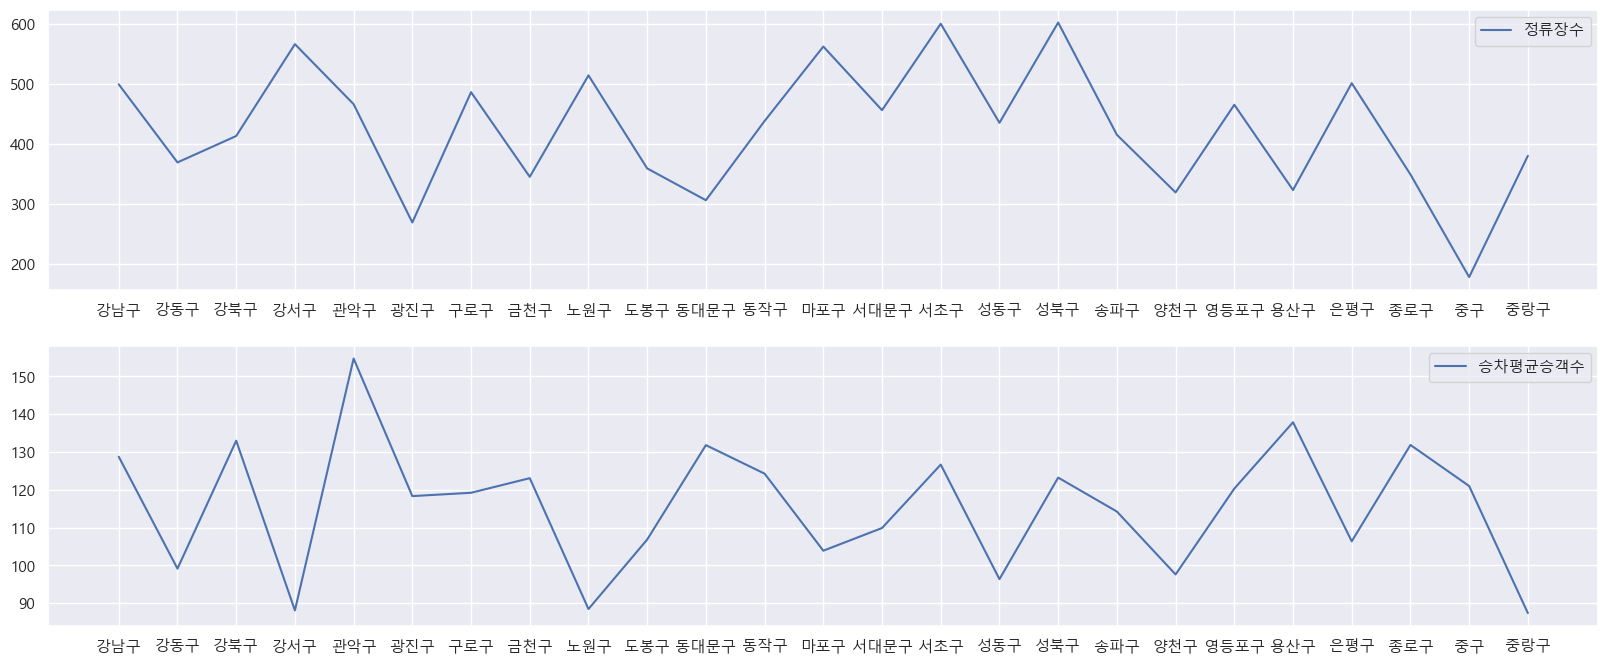

In [105]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
plt.plot('구', '정류장수', data=df_seoul_bus_station)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot('구', '승차평균승객수', data=df_seoul_bus_station)
plt.legend()

plt.show()

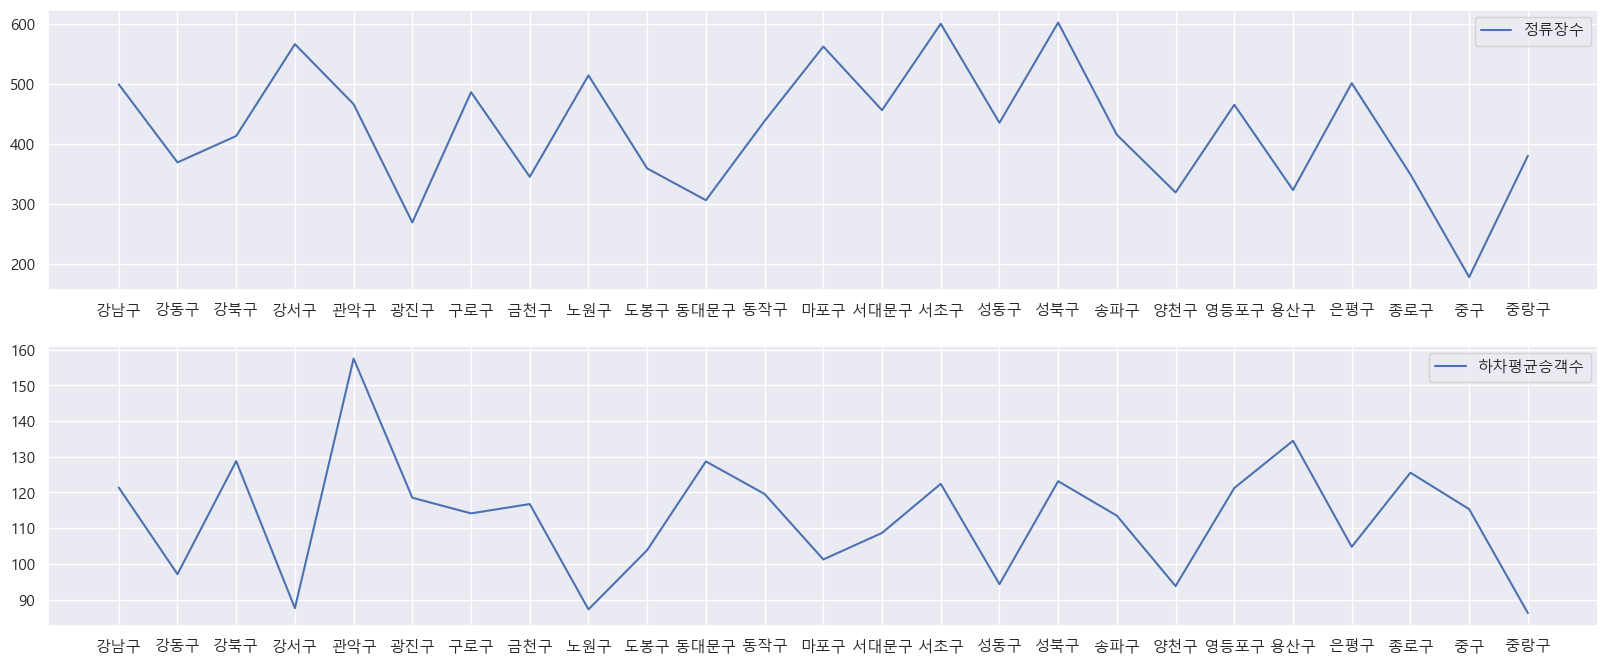

In [110]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
plt.plot('구', '정류장수', data=df_seoul_bus_station)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot('구', '하차평균승객수', data=df_seoul_bus_station)
plt.legend()

plt.show()

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
plt.plot('구', '정류장수', data=df_seoul_bus_station)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot('구', '하차총승객수', data=df_seoul_bus_station)
plt.legend()

plt.show()

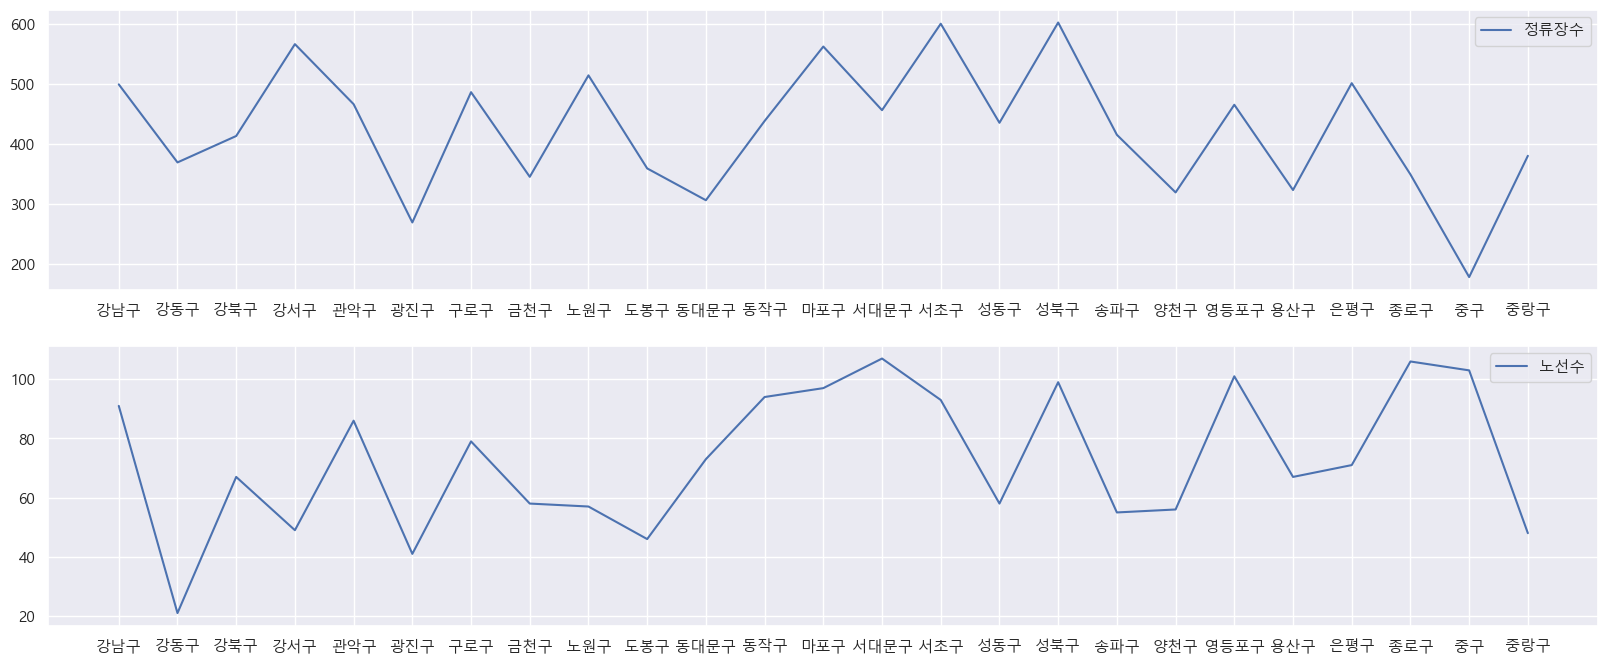

In [106]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
plt.plot('구', '정류장수', data=df_seoul_bus_station)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot('구', '노선수', data=df_seoul_bus_station)

plt.legend()

plt.show()

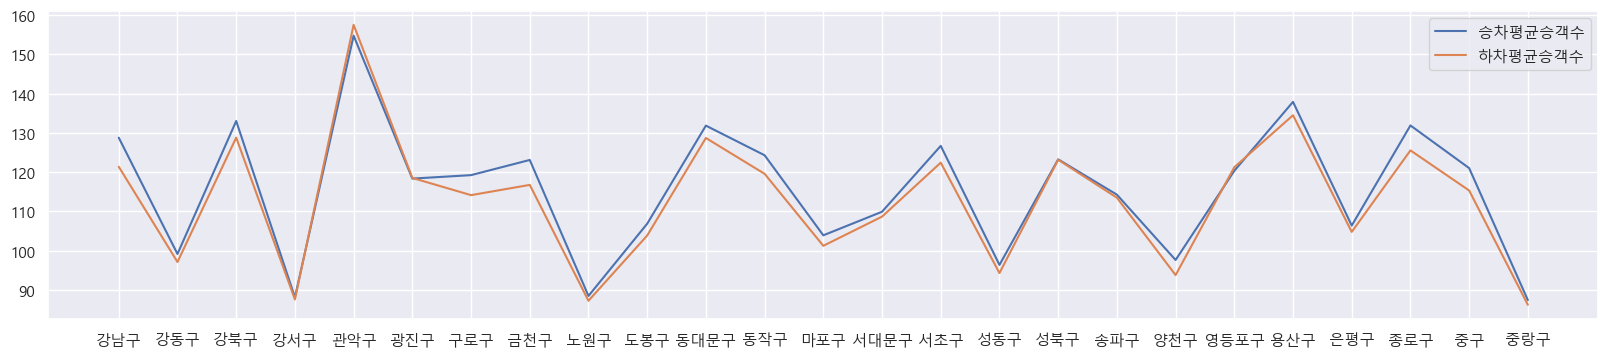

In [112]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20, 4))
plt.plot('구', '승차평균승객수', data=df_seoul_bus_station)
plt.plot('구', '하차평균승객수', data=df_seoul_bus_station)

plt.legend()

plt.show()

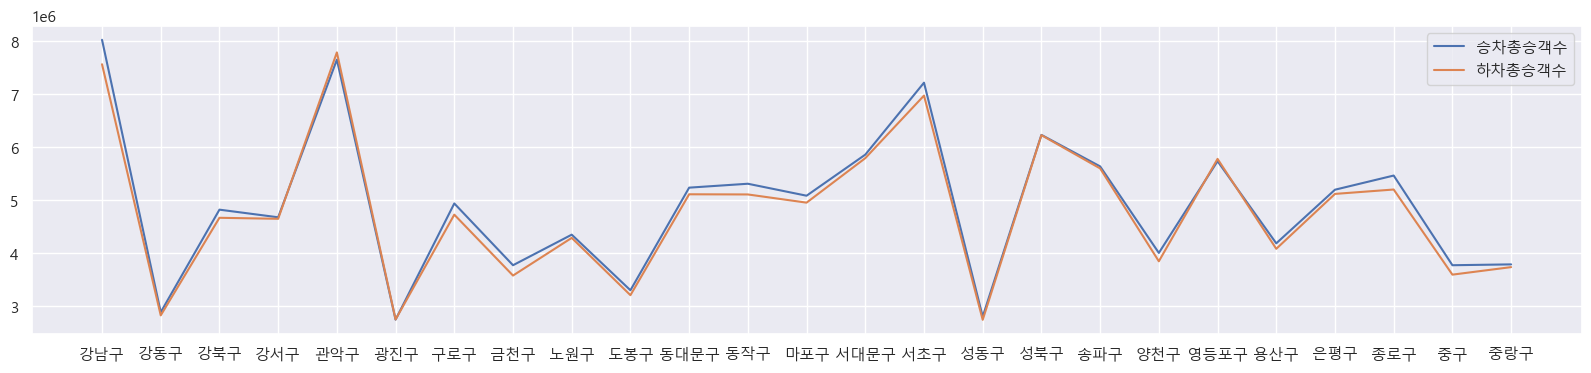

In [113]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20, 4))
plt.plot('구', '승차총승객수', data=df_seoul_bus_station)
plt.plot('구', '하차총승객수', data=df_seoul_bus_station)

plt.legend()

plt.show()

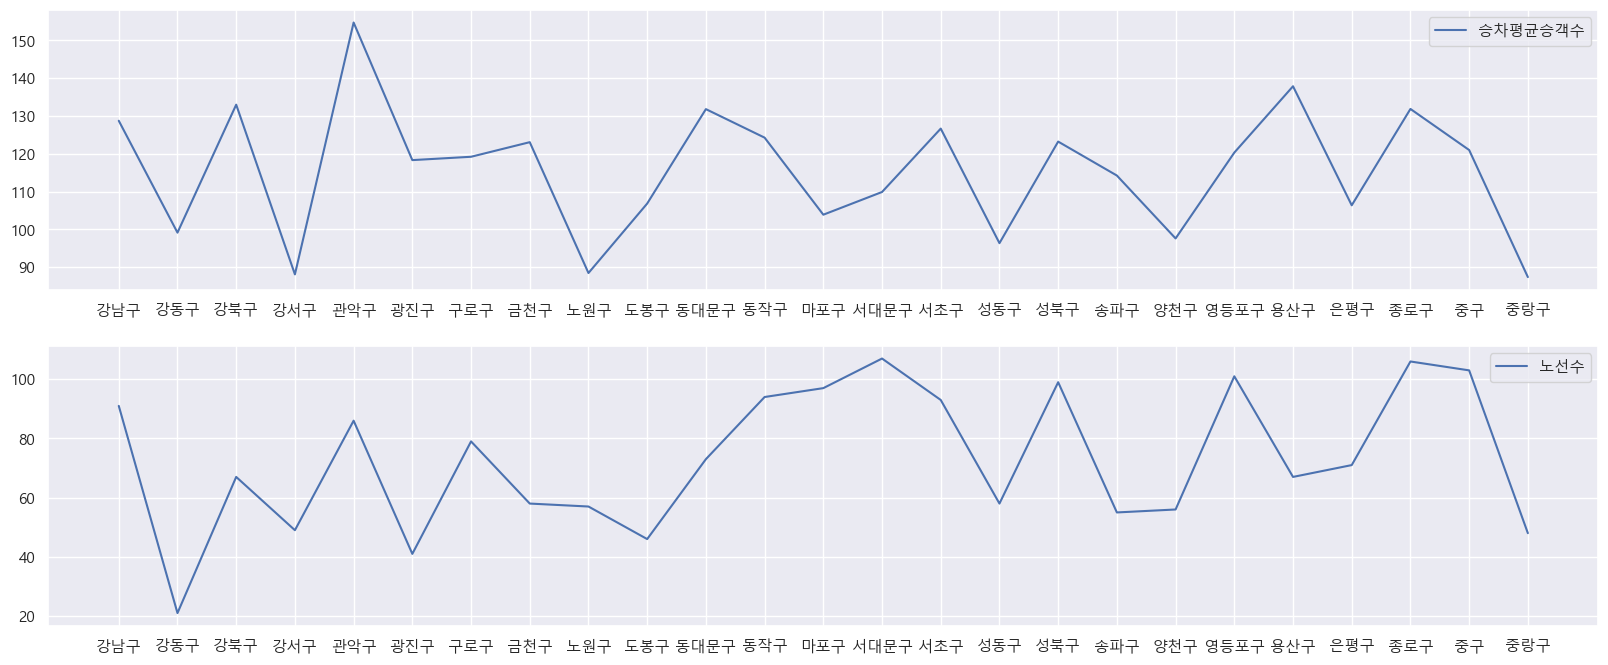

In [115]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
plt.plot('구', '승차평균승객수', data=df_seoul_bus_station)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot('구', '노선수', data=df_seoul_bus_station)

plt.legend()

plt.show()

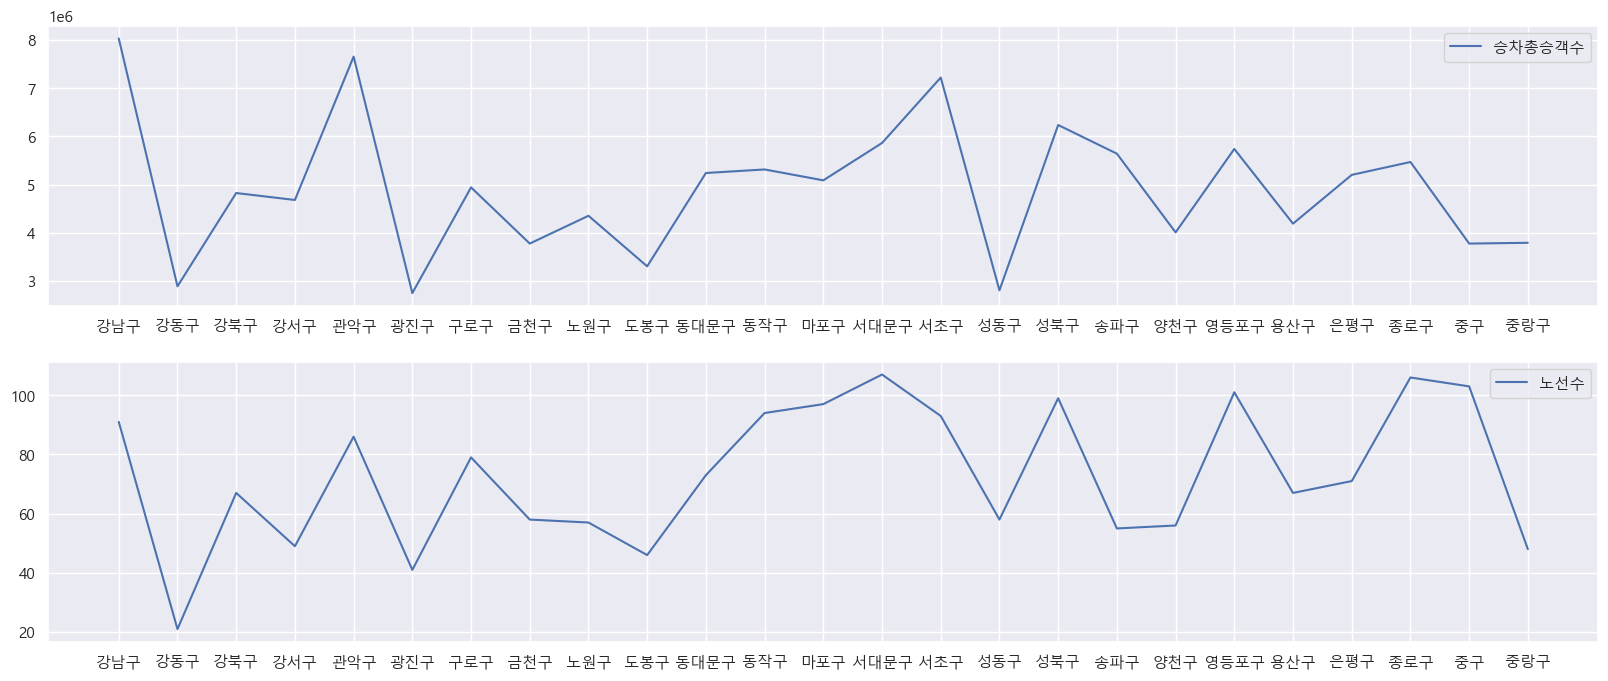

In [116]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
plt.plot('구', '승차총승객수', data=df_seoul_bus_station)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot('구', '노선수', data=df_seoul_bus_station)

plt.legend()

plt.show()

In [117]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 구별 '승차 총 승객수'와 '하차 총 승객수'는 비슷함.
# 2. 구별 '정류장수'와 '승차평균승객수', '하차평균승객수'를 비교했을 때, 정류장수와 승객수가 차이가 많이 나는 구들 존재함.
# 3. 구별 '승/하차 총 승객수'와 '승/하차 총 평균 승객수'를 비교했을 때, 차이가 나는 구들 존재함. -> 정류장수가 많거나 적거나?
# 4. 구별 '정류장 수'와 '노선 수'
# 5. 구별 '노선 수'에 따른 '승차 총 승객수'
# 6. 구별 '노선 수'에 따른 '승차 평균 승객수' -> 

---